In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from matplotlib import cm
import seaborn as sns

0. Сбор датасета и беглый анализ фичей

In [2]:
data = pd.read_csv('u.data', sep = '\t', header = None) #информация по тому когда какую оценку поставил юзер
user = pd.read_csv('u.user', sep = '|', header = None) #информация о юзере
data.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
user.columns = ['user_id', 'age', 'gender', 'occupation', 'zip code']

In [3]:
#сами фильмы
item = pd.read_csv('u.item', sep = '|', header = None, encoding='latin-1')
item.columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date',
              'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']
item.head()

,movie_id,movie_title,release_date,video_release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
data = (pd.merge(data, user)).merge(item)
data.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code,movie_title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'age', 'gender',
       'occupation', 'zip code', 'movie_title', 'release_date',
       'video_release_date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [6]:
data.shape

(100000, 31)

In [7]:
# data['movie title'].value_counts()
# data.columns
# data['user id'].value_counts()

movie_title
Independence Day (ID4) (1996)    429
Air Force One (1997)             431
Toy Story (1995)                 452
Scream (1996)                    478
English Patient, The (1996)      481
Liar Liar (1997)                 485
Return of the Jedi (1983)        507
Fargo (1996)                     508
Contact (1997)                   509
Star Wars (1977)                 583
dtype: int64

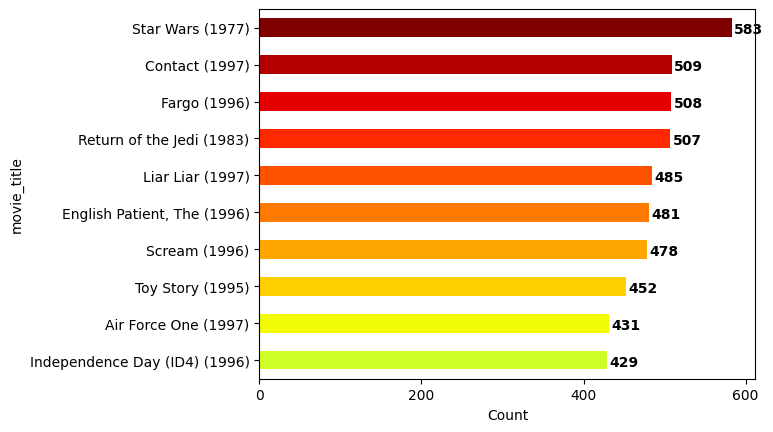

In [8]:
# Самые топ-рейтинг фил
fig1=plt.figure()
top_10_rated = data.groupby('movie_title').size().sort_values()[-10:]
display(top_10_rated)

top_10_rated.plot(kind = 'barh', color = [ cm.jet(x) for x in np.linspace(0.6, 1, 10) ])
for i, v in enumerate(top_10_rated):
    plt.text(v + 3, i-0.15 , str(v), color='black', fontweight='bold')
plt.xlabel('Count')
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.show()

Мда, ну тут все фильмы с высокой оценкой - бумерские (< 2000), может быть из-за специфики начала сбора данных. Если посмотреть на возврастное распределение, возможно это подвердится:

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


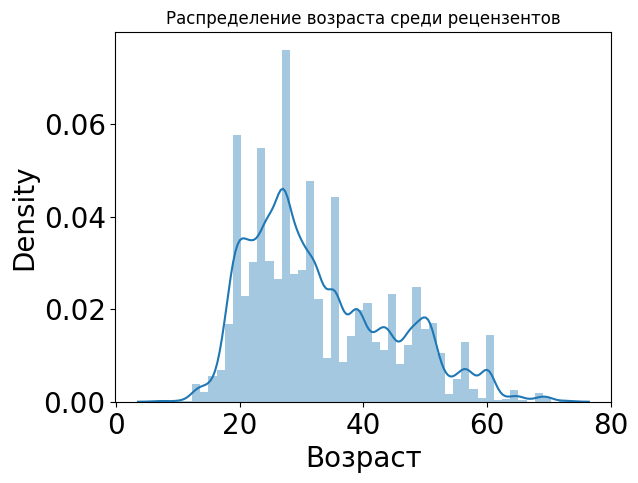

In [9]:
sns.distplot(data.age)
plt.xlabel("Возраст")
plt.title("Распределение возраста среди рецензентов")
plt.show()

In [10]:
data.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'age', 'gender',
       'occupation', 'zip code', 'movie_title', 'release_date',
       'video_release_date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [11]:
# num_users = data['user_id'].nunique()
# num_items = data['movie_id'].nunique()
# print("number of unique users:", num_users)
# print("number of unique items:", num_items)

In [12]:
# user_item_matrix = np.zeros((num_users, num_items))
# for row in data.itertuples():
#     user, movie, rating = row.user_id, row.movie_id, row.rating
#     user_item_matrix[user-1, movie-1] = rating

In [13]:
# user_item_matrix = user_item_matrix / np.sum(user_item_matrix, axis=1)[:, np.newaxis]
# user_item_matrix = user_item_matrix.T
# damping_factor = 0.85
# user_item_matrix = damping_factor * user_item_matrix + (1 - damping_factor) / num_items

In [14]:
# num_iterations = 100
# error_threshold = 0.001

In [15]:
# pr_vector = np.ones(num_items) / num_items
# prev_pr_vector = np.zeros(num_items)
# for i in range(num_iterations):
#     prev_pr_vector = pr_vector.copy()
#     pr_vector = user_item_matrix.T.dot(prev_pr_vector)
#     if np.linalg.norm(pr_vector - prev_pr_vector) < error_threshold:
#         break

In [16]:
import networkx as nx

In [17]:
G = nx.Graph()

G.add_nodes_from(data['movie_id'].unique())
for user, movie_group in data.groupby('user_id'):
    movie_group = movie_group['movie_id']
    for movie1, movie2 in zip(movie_group, movie_group.shift(-1).dropna()):
        if not G.has_edge(movie1, movie2):
            G.add_edge(movie1, movie2)

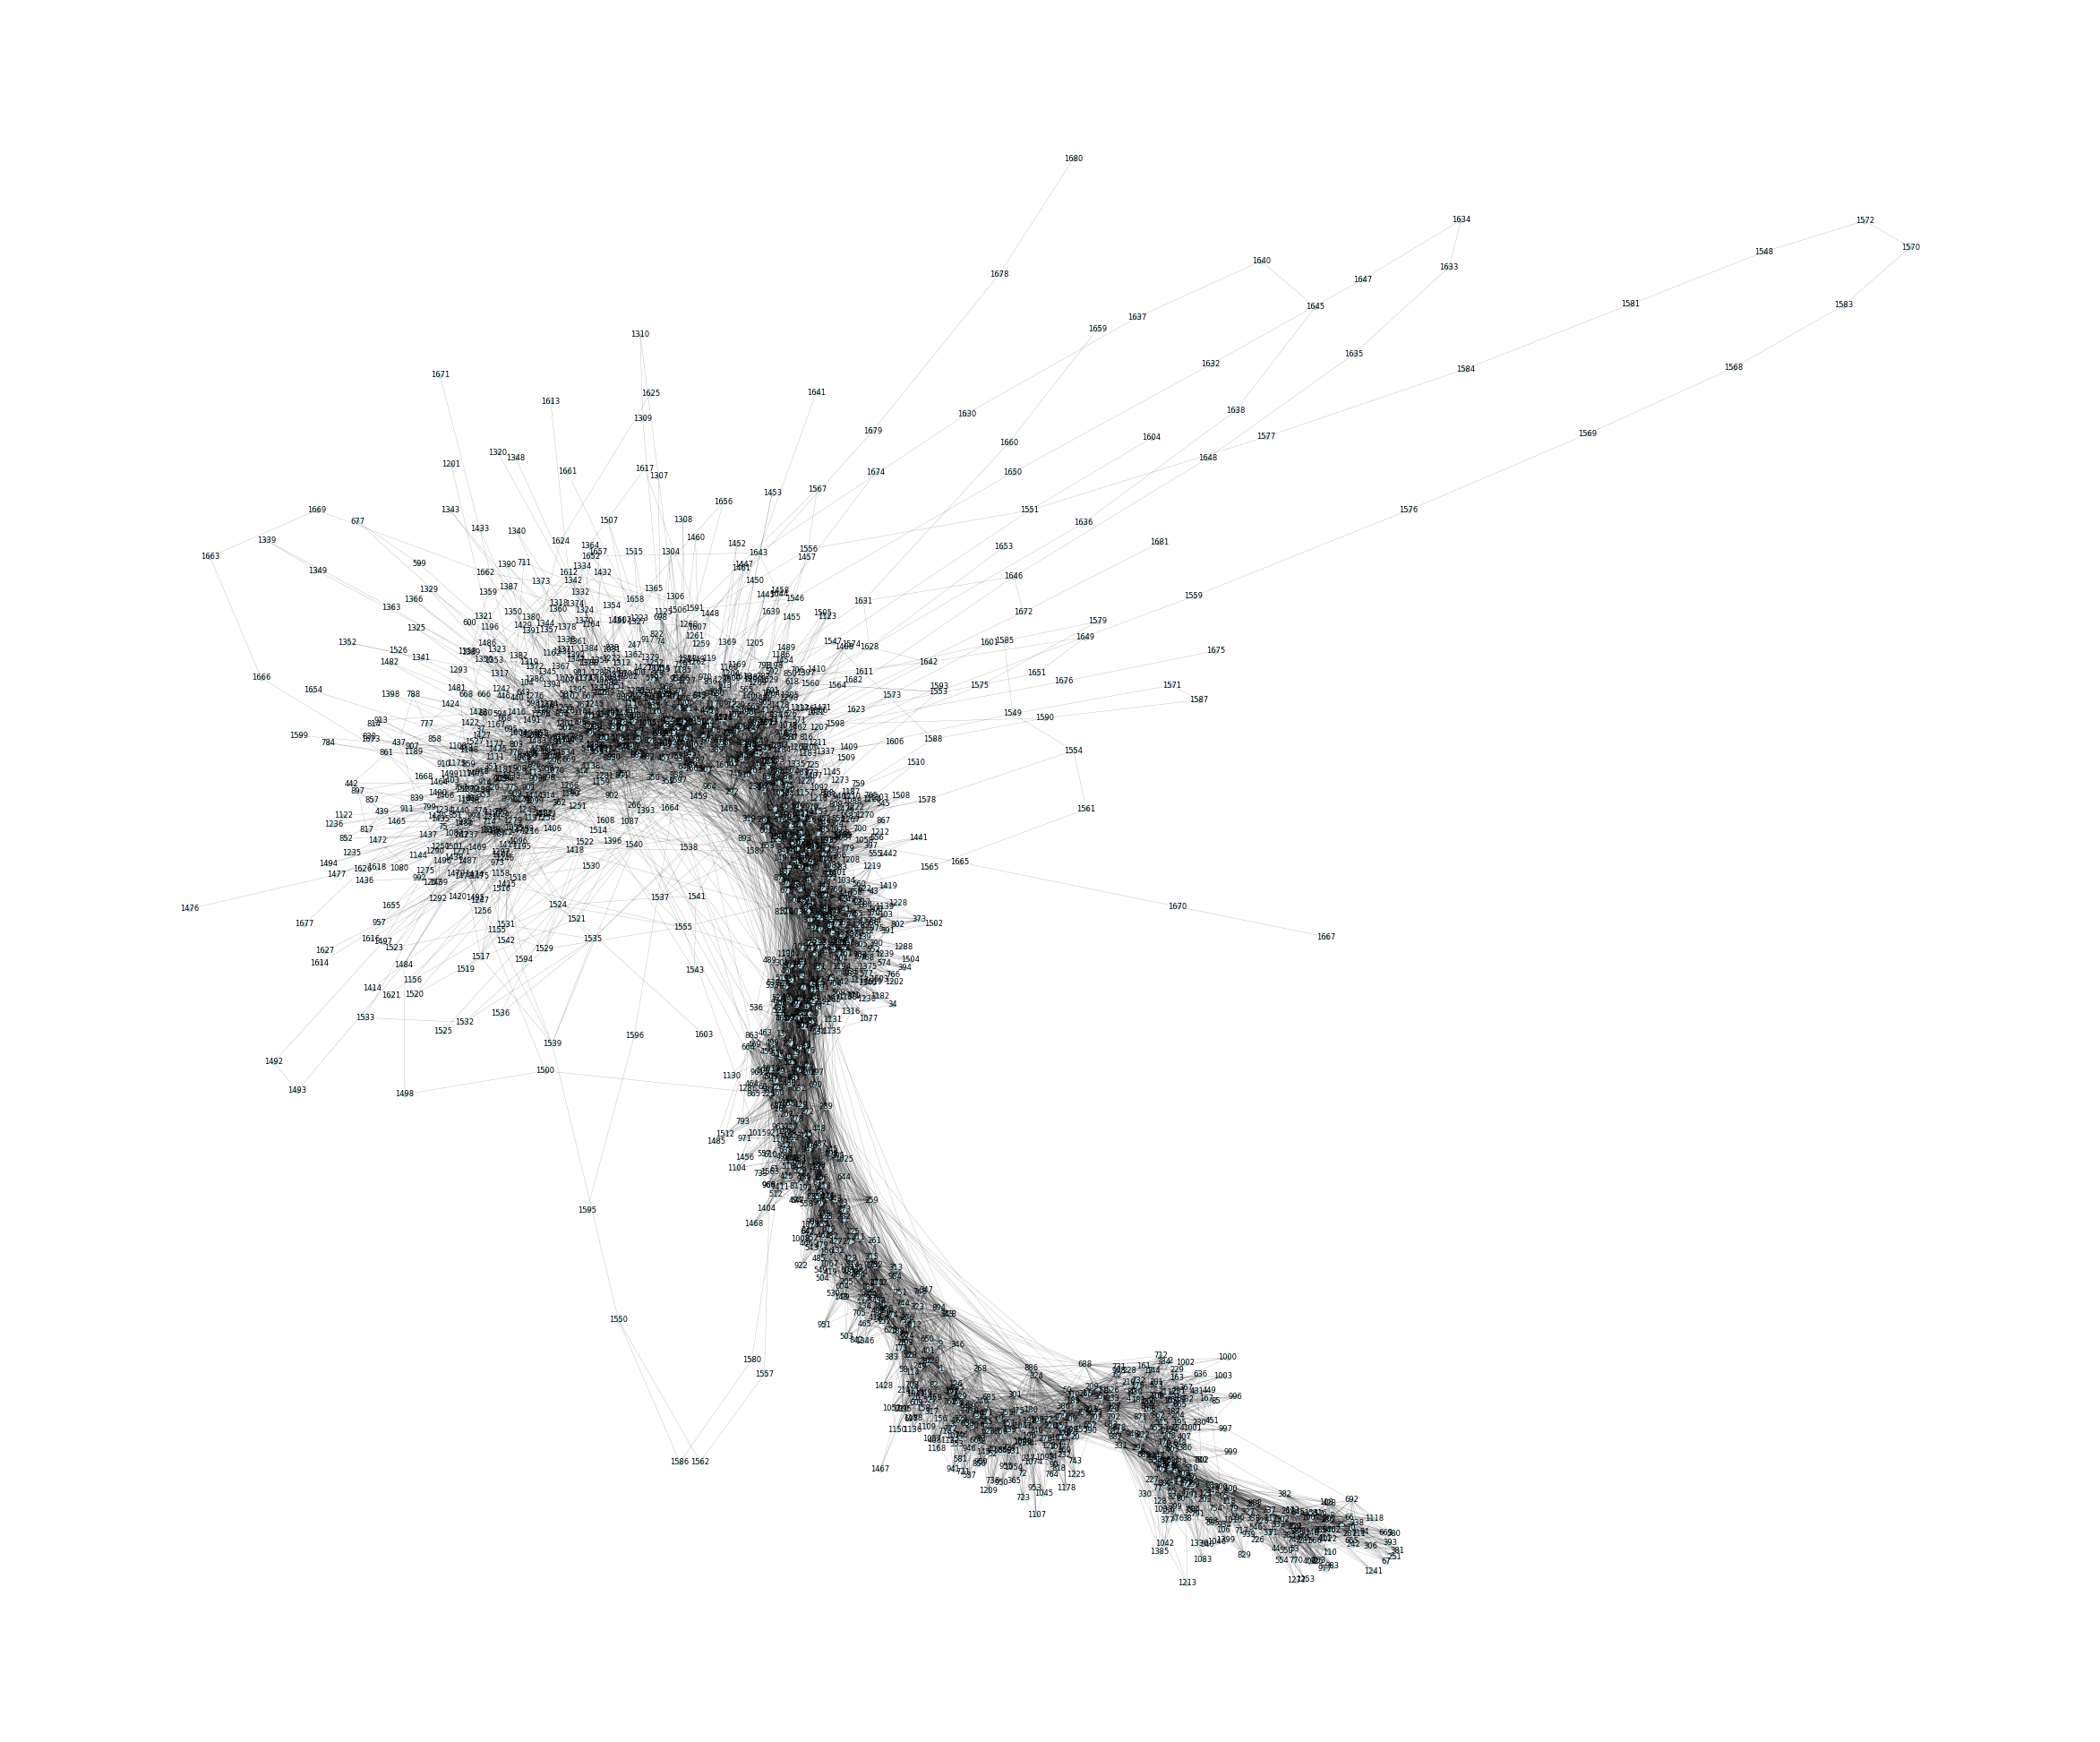

In [18]:
plt.figure(figsize=(30, 25))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=0.2, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=6, font_family='sans-serif')
plt.axis('off')
plt.show()

### Personalized PageRank

In [19]:
!pip install recmetrics

In [20]:
from sklearn.model_selection import train_test_split
from networkx.algorithms import bipartite
from tqdm import tqdm
import matplotlib.pyplot as plt
import recmetrics

In [21]:
train, test = train_test_split(data, test_size=0.2, random_state=42)


edges = []
users = set()
movies = set()
for index, row in train.iterrows():
    user, movie = row["user_id"] + 1000000, row["movie_id"] # чтобы не было пересечений в айдишниках сделаем шифт у юзеров
    edges.append((user, movie, row["rating"]))
    users.add(user)
    movies.add(movie)


user_movie_graph_train = nx.Graph()
user_movie_graph_train.add_nodes_from(list(users) + list(movies))
user_movie_graph_train.add_weighted_edges_from(edges)
movie_movie_graph_train = bipartite.weighted_projected_graph(user_movie_graph_train, list(movies), ratio=True)

In [22]:
print(f"Кол-во юзеров: {len(users)}")
print(f"Кол-во фильмов: {len(movies)}")

Кол-во юзеров: 943
Кол-во фильмов: 1657


In [23]:
class PersonalizedPageRankRecSys:
    def __init__(self, user_movie_graph, movie_movie_graph, movies):
        self.user_movie_graph = user_movie_graph
        self.movie_movie_graph = movie_movie_graph
        self.movies = movies

    def create_preference_vector(self, user_id):
        if user_id not in self.user_movie_graph.nodes():
            return None

        edges = {m: w for _, m, w in self.user_movie_graph.edges(user_id, data="weight")}
        total = sum(edges.values())

        if total > 0:
            return {movie: edges.get(movie, 0) / total for movie in self.movies}
        else:
            return {movie: 1 for movie in self.movies}

    def recommend(self, user_id):
        p_vec = self.create_preference_vector(user_id)

        if p_vec is None:
            pr = nx.pagerank(self.movie_movie_graph)
        else:
            pr = nx.pagerank(self.movie_movie_graph, personalization=p_vec)

        sorted_nodes = sorted(pr.items(), key=lambda x: x[1], reverse=True)

        if p_vec is None:
            recommended_nodes = [(node, score) for node, score in sorted_nodes]
        else:
            recommended_nodes = [(node, score) for node, score in sorted_nodes if node not in self.user_movie_graph[user_id]]

        return recommended_nodes



def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.

    This function computes the average prescision at k between two lists of
    items.

    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements

    Returns
    -------
    score : double
            The average precision at k over the input lists

    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.

    This function computes the mean average prescision at k between two lists
    of lists of items.

    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements

    Returns
    -------
    score : double
            The mean average precision at k over the input lists

    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [24]:
recsys = PersonalizedPageRankRecSys(user_movie_graph_train, movie_movie_graph_train, movies)

In [25]:
users_movies_test = dict()

for index, row in test.iterrows():
    user, movie = row["user_id"] + 1000000, row["movie_id"] # чтобы не было пересечений в айдишниках сделаем шифт у юзеров
    if user in users_movies_test:
        users_movies_test[user].append(movie)
    else:
        users_movies_test[user] = [movie]

In [26]:
users_movies_pred = dict()
users_to_predict = [1000000 + i for i in range(1, 100)]

for user in tqdm(users_to_predict):
    users_movies_pred[user] = recsys.recommend(user)[:100]

100%|██████████| 99/99 [04:42<00:00,  2.85s/it]


In [27]:
MAP = []
MAR = []

for k in range(1, 100):
    y_true = []
    y_pred = []
    for user in users_to_predict:
        true = users_movies_test[user]
        pred = [p[0] for p in users_movies_pred[user]][:k]

        y_true.append(true)
        y_pred.append(pred)

    MAR.append(recmetrics.mark(y_true, y_pred, k = k))
    MAP.append(mapk(y_true, y_pred, k = k))

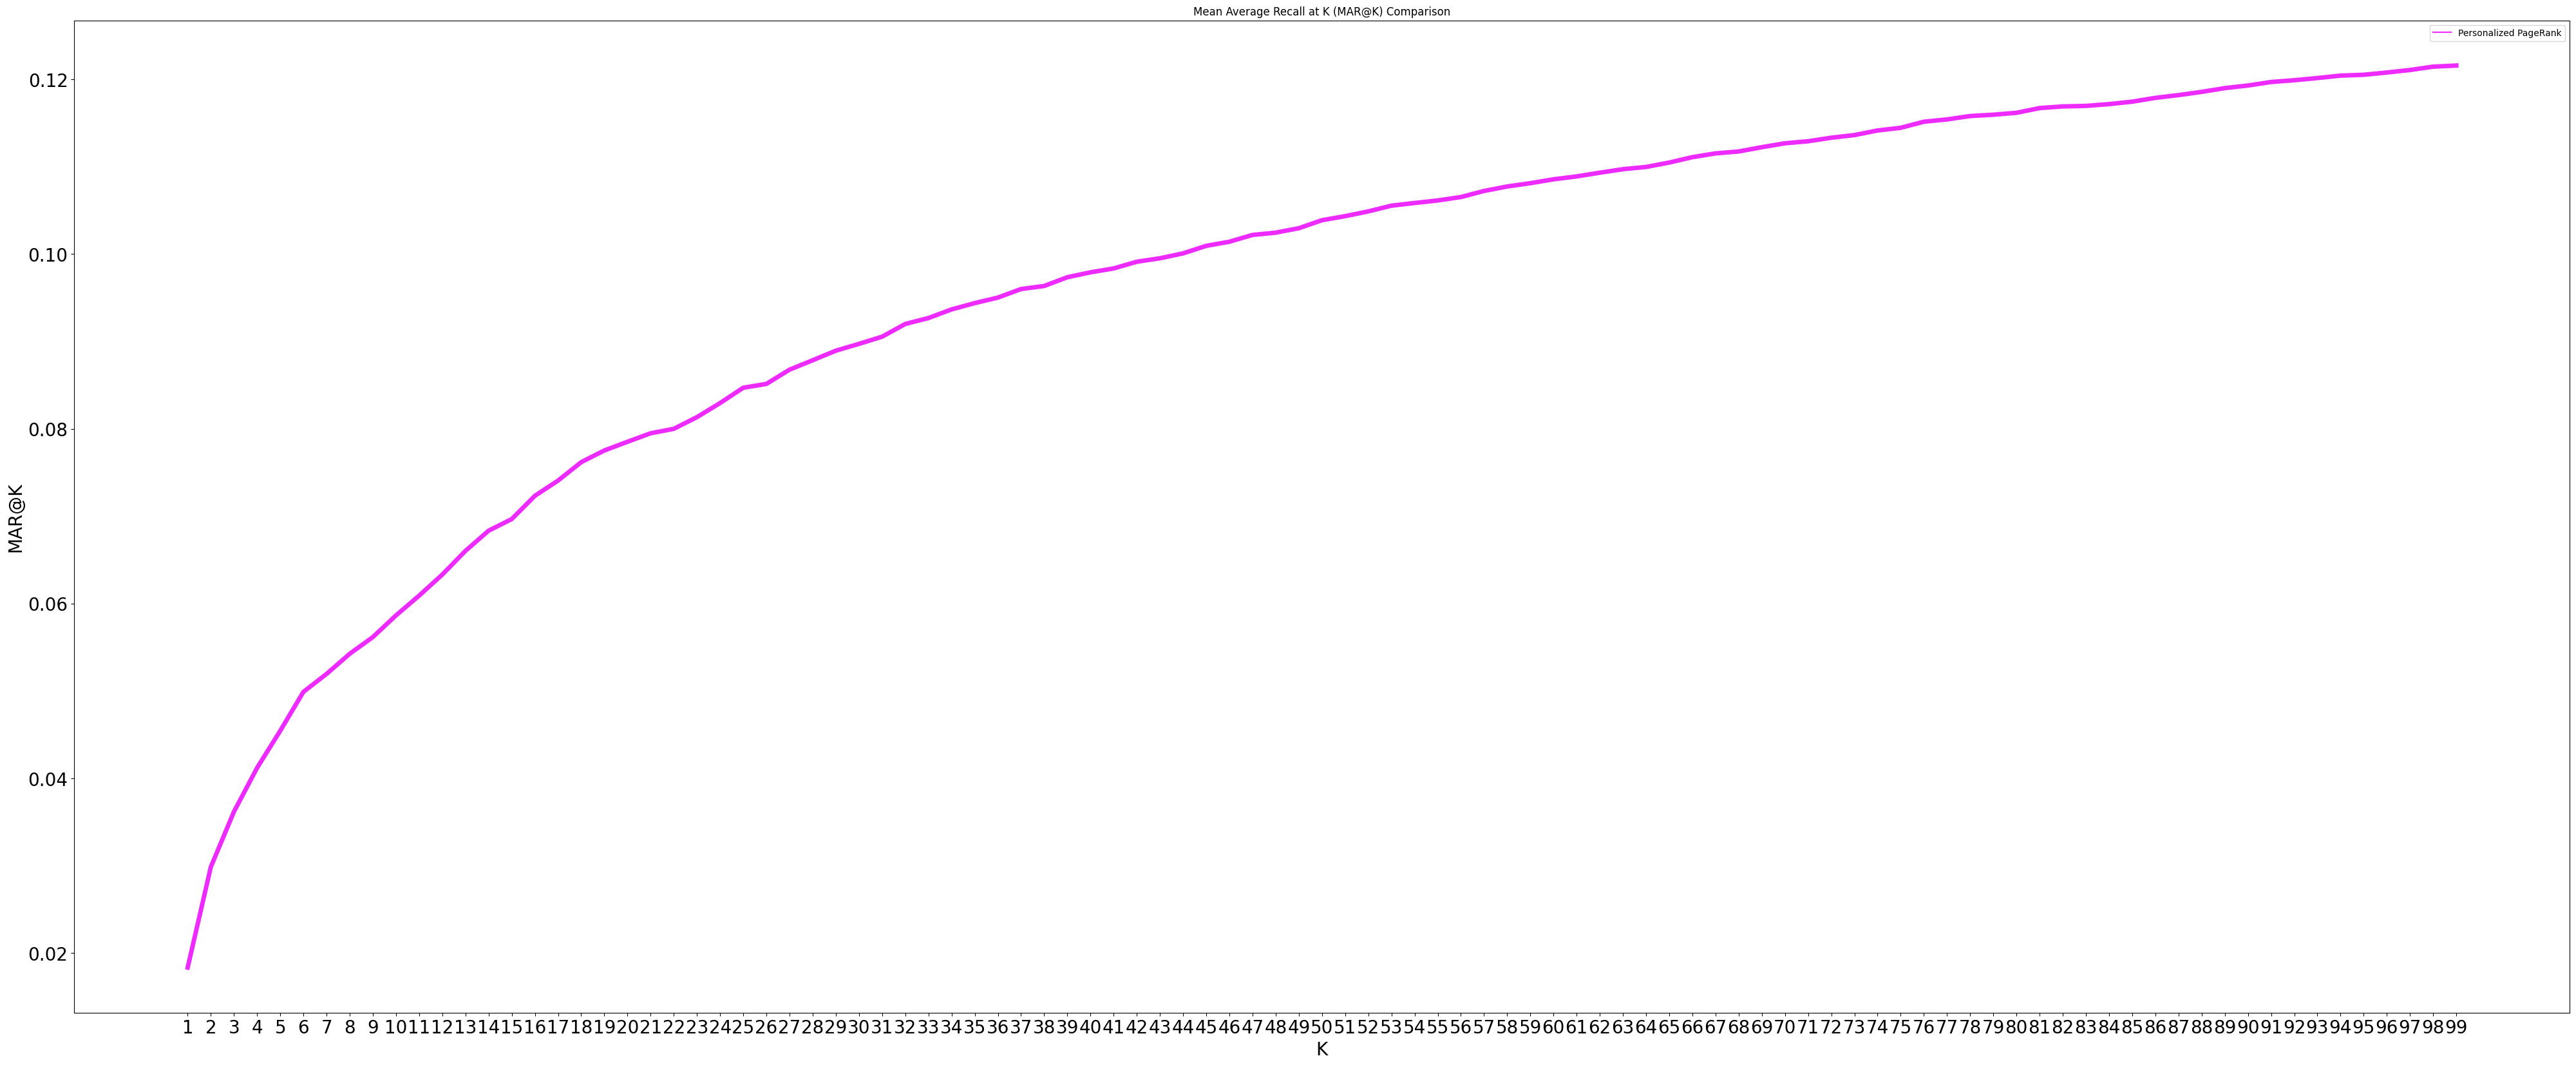

In [28]:
plt.figure(figsize=(50, 20))
recmetrics.mark_plot([MAR], ["Personalized PageRank"], range(1, 100))

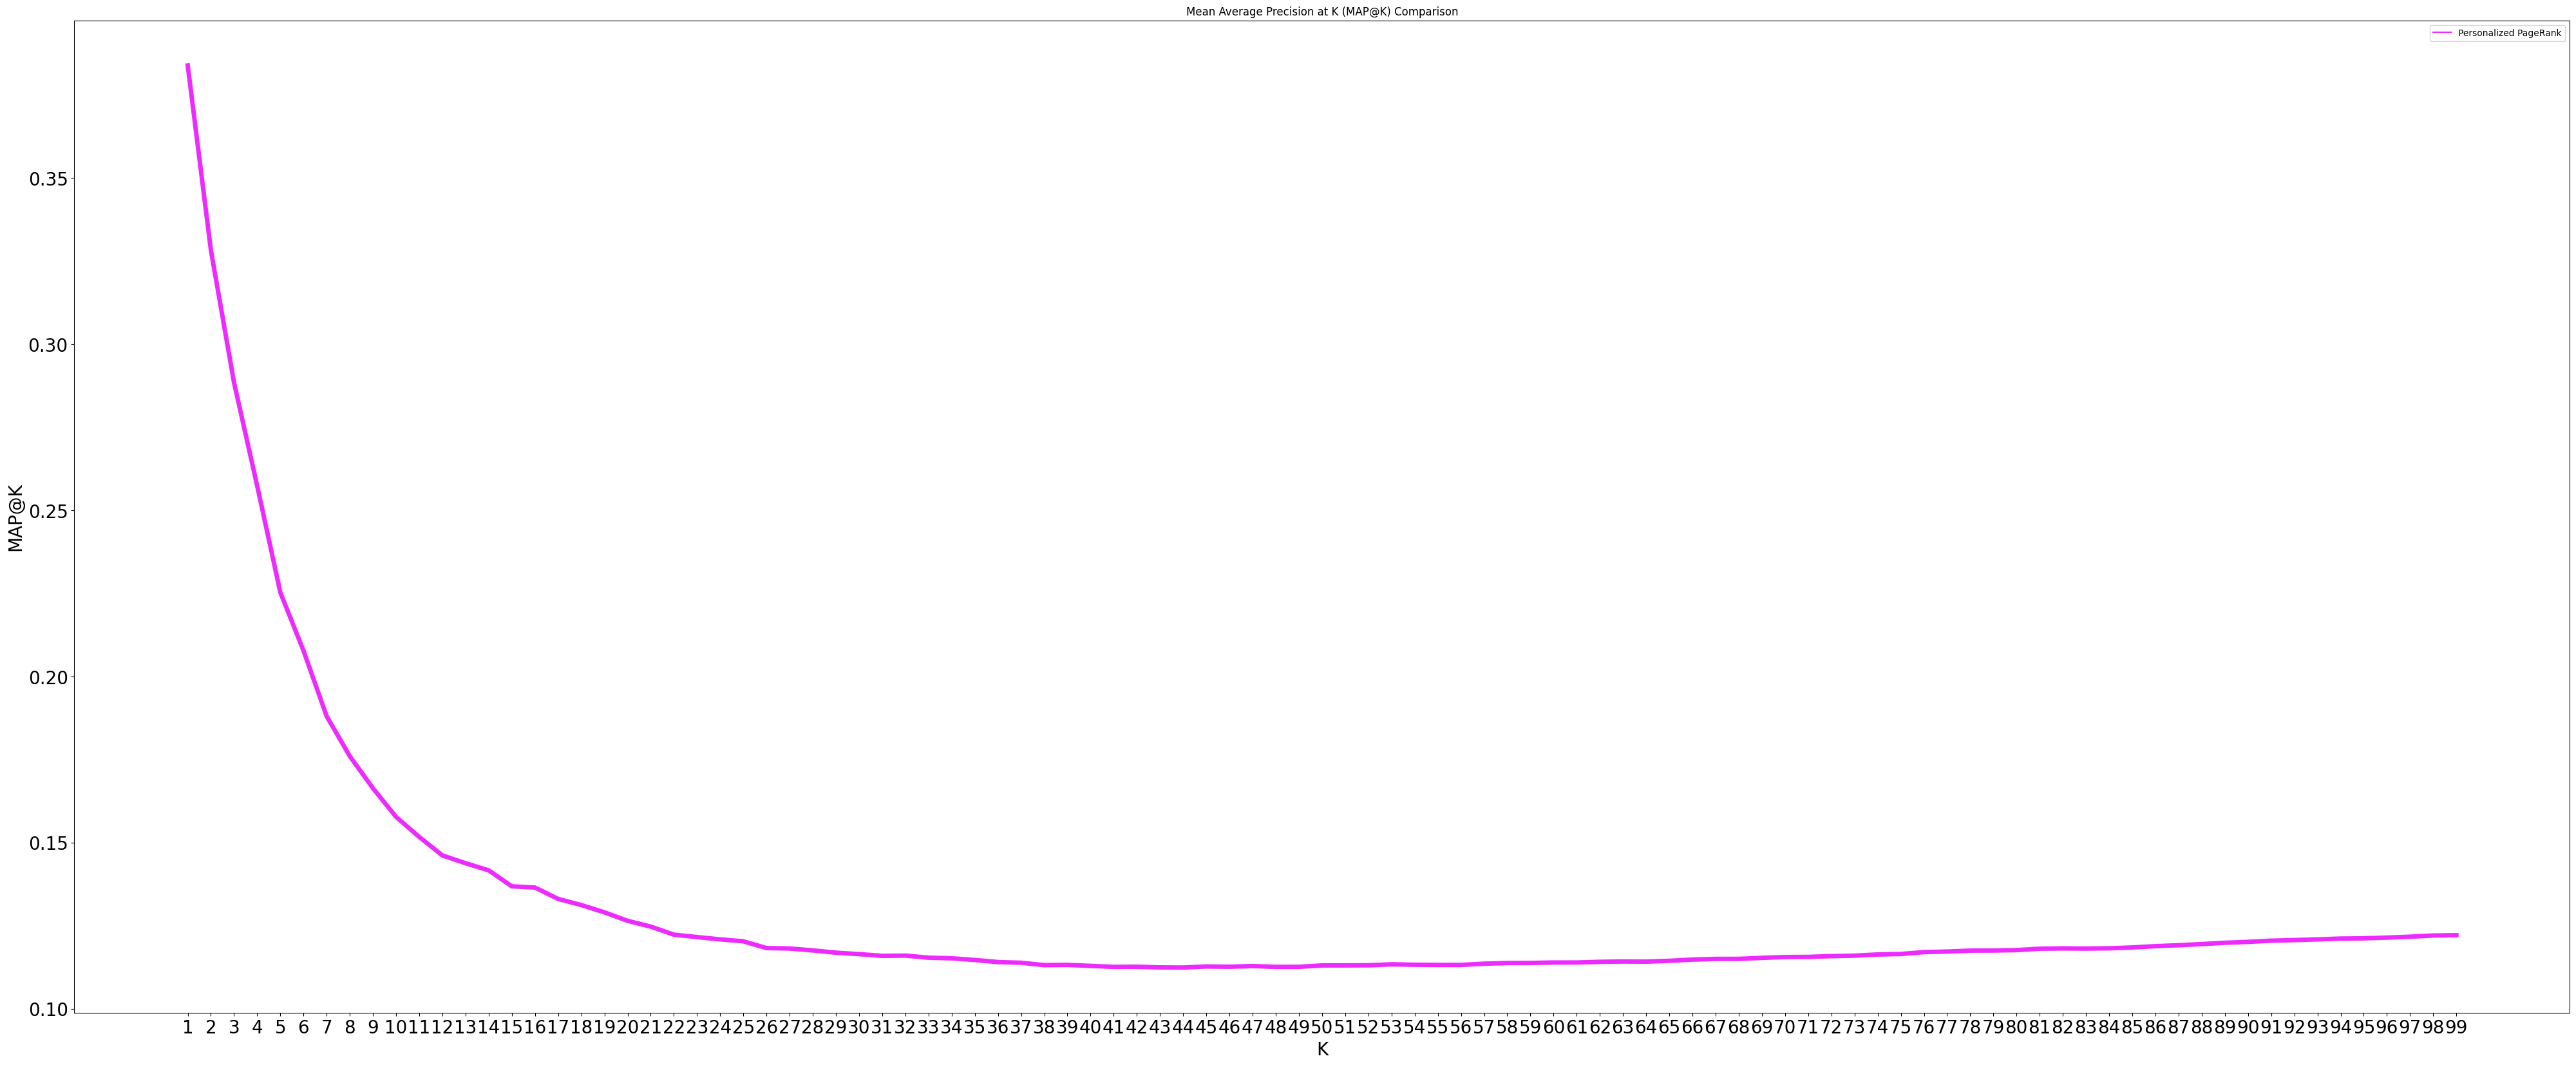

In [29]:
plt.figure(figsize=(50, 20))
recmetrics.mapk_plot([MAP], ["Personalized PageRank"], range(1, 100))

### LightGCN

In [30]:
!pip install torch_geometric

In [31]:
import random
import time

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch_geometric
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.utils import degree

from tqdm.notebook import tqdm
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
import scipy.sparse as sp

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [33]:
le_user = pp.LabelEncoder()
le_item = pp.LabelEncoder()
train['user_id_idx'] = le_user.fit_transform(train['user_id'].values)
train['movie_id_idx'] = le_item.fit_transform(train['movie_id'].values)

In [35]:
train_user_ids = train['user_id'].unique()
train_item_ids = train['movie_id'].unique()

test = test[
  (test['user_id'].isin(train_user_ids)) & \
  (test['movie_id'].isin(train_item_ids))
]

In [36]:
test['user_id_idx'] = le_user.transform(test['user_id'].values)
test['movie_id_idx'] = le_item.transform(test['movie_id'].values)

In [37]:
n_users = train['user_id_idx'].nunique()
n_items = train['movie_id_idx'].nunique()
print("Number of Unique Users : ", n_users)
print("Number of unique Items : ", n_items)

Number of Unique Users :  943
Number of unique Items :  1657


In [38]:
u_t = torch.LongTensor(train.user_id_idx)
i_t = torch.LongTensor(train.movie_id_idx) + n_users

train_edge_index = torch.stack((
  torch.cat([u_t, i_t]),
  torch.cat([i_t, u_t])
)).to(device)
train_edge_index

tensor([[ 753,  536,  632,  ...,  989, 1248, 1040],
        [1418, 1139, 1352,  ...,  681,  720,  143]], device='cuda:0')

In [39]:
def data_loader(data, batch_size, n_usr, n_itm):

    def sample_neg(x):
        while True:
            neg_id = random.randint(0, n_itm - 1)
            if neg_id not in x:
                return neg_id

    interected_items_df = data.groupby('user_id_idx')['movie_id_idx'].apply(list).reset_index()
    indices = [x for x in range(n_usr)]

    if n_usr < batch_size:
        users = [random.choice(indices) for _ in range(batch_size)]
    else:
        users = random.sample(indices, batch_size)
    users.sort()
    users_df = pd.DataFrame(users,columns = ['users'])

    interected_items_df = pd.merge(interected_items_df, users_df, how = 'right', left_on = 'user_id_idx', right_on = 'users')
    pos_items = interected_items_df['movie_id_idx'].apply(lambda x : random.choice(x)).values
    neg_items = interected_items_df['movie_id_idx'].apply(lambda x: sample_neg(x)).values

    return (
        torch.LongTensor(list(users)).to(device),
        torch.LongTensor(list(pos_items)).to(device) + n_usr,
        torch.LongTensor(list(neg_items)).to(device) + n_usr
    )


class LightGCNConv(MessagePassing):
  def __init__(self, **kwargs):
    super().__init__(aggr='add')

  def forward(self, x, edge_index):
    from_, to_ = edge_index
    deg = degree(to_, x.size(0), dtype=x.dtype)
    deg_inv_sqrt = deg.pow(-0.5)
    deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0
    norm = deg_inv_sqrt[from_] * deg_inv_sqrt[to_]

    return self.propagate(edge_index, x=x, norm=norm)

  def message(self, x_j, norm):
    return norm.view(-1, 1) * x_j


class RecSysGNN(nn.Module):
  def __init__(
      self,
      latent_dim,
      num_layers,
      num_users,
      num_items,
  ):
    super(RecSysGNN, self).__init__()

    self.embedding = nn.Embedding(num_users + num_items, latent_dim)
    self.convs = nn.ModuleList(LightGCNConv() for _ in range(num_layers))
    self.init_parameters()


  def init_parameters(self):
    nn.init.normal_(self.embedding.weight, std=0.1)


  def forward(self, edge_index):
    emb0 = self.embedding.weight
    embs = [emb0]

    emb = emb0
    for conv in self.convs:
      emb = conv(x=emb, edge_index=edge_index)
      embs.append(emb)

    out = (
      torch.mean(torch.stack(embs, dim=0), dim=0)
    )

    return emb0, out


  def encode_minibatch(self, users, pos_items, neg_items, edge_index):
    emb0, out = self(edge_index)
    return (
        out[users],
        out[pos_items],
        out[neg_items],
        emb0[users],
        emb0[pos_items],
        emb0[neg_items]
    )


def compute_bpr_loss(users, users_emb, pos_emb, neg_emb, user_emb0,  pos_emb0, neg_emb0):
  reg_loss = (1 / 2) * (
    user_emb0.norm().pow(2) +
    pos_emb0.norm().pow(2)  +
    neg_emb0.norm().pow(2)
  ) / float(len(users))

  pos_scores = torch.mul(users_emb, pos_emb).sum(dim=1)
  neg_scores = torch.mul(users_emb, neg_emb).sum(dim=1)

  bpr_loss = torch.mean(F.softplus(neg_scores - pos_scores))

  return bpr_loss, reg_loss


def get_metrics(user_Embed_wts, item_Embed_wts, n_users, n_items, train_data, test_data, K):
  test_user_ids = torch.LongTensor(test_data['user_id_idx'].unique())

  relevance_score = torch.matmul(user_Embed_wts, torch.transpose(item_Embed_wts,0, 1))

  i = torch.stack((
    torch.LongTensor(train['user_id_idx'].values),
    torch.LongTensor(train['movie_id_idx'].values)
  ))
  v = torch.ones((len(train)), dtype=torch.float64)
  interactions_t = torch.sparse.FloatTensor(i, v, (n_users, n_items))\
      .to_dense().to(device)

  relevance_score = torch.mul(relevance_score, (1 - interactions_t))

  topk_relevance_indices = torch.topk(relevance_score, K).indices
  topk_relevance_indices_df = pd.DataFrame(topk_relevance_indices.cpu().numpy(),columns =['top_indx_'+str(x+1) for x in range(K)])
  topk_relevance_indices_df['user_ID'] = topk_relevance_indices_df.index
  topk_relevance_indices_df['top_rlvnt_itm'] = topk_relevance_indices_df[['top_indx_'+str(x+1) for x in range(K)]].values.tolist()
  topk_relevance_indices_df = topk_relevance_indices_df[['user_ID','top_rlvnt_itm']]

  test_interacted_items = test_data.groupby('user_id_idx')['movie_id_idx'].apply(list).reset_index()
  metrics_df = pd.merge(test_interacted_items,topk_relevance_indices_df, how= 'left', left_on = 'user_id_idx',right_on = ['user_ID'])
  metrics_df['intrsctn_itm'] = [list(set(a).intersection(b)) for a, b in zip(metrics_df.movie_id_idx, metrics_df.top_rlvnt_itm)]

  metrics_df['recall'] = metrics_df.apply(lambda x : len(x['intrsctn_itm'])/len(x['movie_id_idx']), axis = 1)
  metrics_df['precision'] = metrics_df.apply(lambda x : len(x['intrsctn_itm'])/K, axis = 1)

  return metrics_df['recall'].mean(), metrics_df['precision'].mean()


def train_and_eval(model, optimizer, train_df):
  loss_list_epoch = []
  bpr_loss_list_epoch = []
  reg_loss_list_epoch = []

  recall_list = []
  precision_list = []

  for epoch in tqdm(range(EPOCHS)):
      n_batch = int(len(train)/BATCH_SIZE)

      final_loss_list = []
      bpr_loss_list = []
      reg_loss_list = []

      model.train()
      for batch_idx in range(n_batch):

          optimizer.zero_grad()

          users, pos_items, neg_items = data_loader(train_df, BATCH_SIZE, n_users, n_items)
          users_emb, pos_emb, neg_emb, userEmb0,  posEmb0, negEmb0 = model.encode_minibatch(users, pos_items, neg_items, train_edge_index)

          bpr_loss, reg_loss = compute_bpr_loss(
            users, users_emb, pos_emb, neg_emb, userEmb0,  posEmb0, negEmb0
          )
          reg_loss = DECAY * reg_loss
          final_loss = bpr_loss + reg_loss

          final_loss.backward()
          optimizer.step()

          final_loss_list.append(final_loss.item())
          bpr_loss_list.append(bpr_loss.item())
          reg_loss_list.append(reg_loss.item())

      model.eval()
      with torch.no_grad():
          _, out = model(train_edge_index)
          final_user_Embed, final_item_Embed = torch.split(out, (n_users, n_items))
          test_topK_recall,  test_topK_precision = get_metrics(
            final_user_Embed, final_item_Embed, n_users, n_items, train_df, test, K
          )

      loss_list_epoch.append(round(np.mean(final_loss_list),4))
      bpr_loss_list_epoch.append(round(np.mean(bpr_loss_list),4))
      reg_loss_list_epoch.append(round(np.mean(reg_loss_list),4))

      recall_list.append(round(test_topK_recall,4))
      precision_list.append(round(test_topK_precision,4))

  return (
    loss_list_epoch,
    bpr_loss_list_epoch,
    reg_loss_list_epoch,
    recall_list,
    precision_list
  )

In [49]:
latent_dim = 64
n_layers = 3

EPOCHS = 50
BATCH_SIZE = 1024
DECAY = 0.0001
LR = 0.005
K = 20

In [50]:
lightgcn = RecSysGNN(
  latent_dim=latent_dim,
  num_layers=n_layers,
  num_users=n_users,
  num_items=n_items,
)
lightgcn.to(device)

optimizer = torch.optim.Adam(lightgcn.parameters(), lr=LR)

In [51]:
light_loss, light_bpr, light_reg, light_recall, light_precision = train_and_eval(lightgcn, optimizer, train)

  0%|          | 0/50 [00:00<?, ?it/s]

In [52]:
epoch_list = [(i+1) for i in range(EPOCHS)]

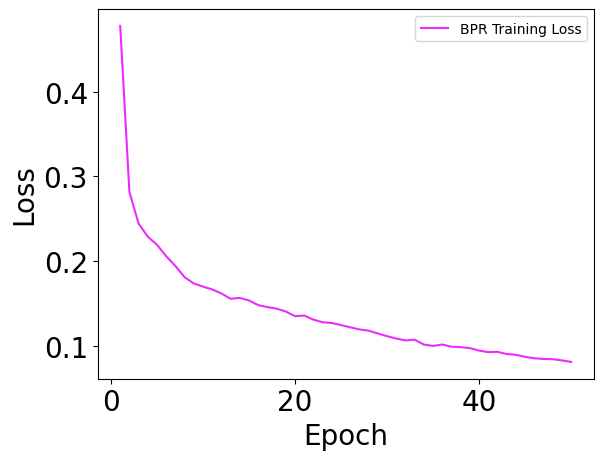

In [53]:
plt.plot(epoch_list, light_bpr, label='BPR Training Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

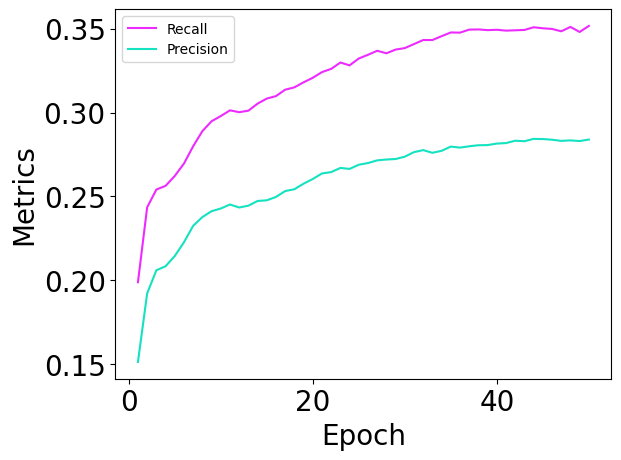

In [54]:
plt.plot(epoch_list, light_recall, label='Recall')
plt.plot(epoch_list, light_precision, label='Precision')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()

In [55]:
def get_preds(user_Embed_wts, item_Embed_wts, n_users, n_items, train_data, test_data, K):
  test_user_ids = torch.LongTensor(test_data['user_id_idx'].unique())
  relevance_score = torch.matmul(user_Embed_wts, torch.transpose(item_Embed_wts,0, 1))

  i = torch.stack((
    torch.LongTensor(train['user_id_idx'].values),
    torch.LongTensor(train['movie_id_idx'].values)
  ))
  v = torch.ones((len(train)), dtype=torch.float64)
  interactions_t = torch.sparse.FloatTensor(i, v, (n_users, n_items))\
      .to_dense().to(device)

  relevance_score = torch.mul(relevance_score, (1 - interactions_t))

  topk_relevance_indices = torch.topk(relevance_score, K).indices
  topk_relevance_indices_df = pd.DataFrame(topk_relevance_indices.cpu().numpy(),columns =['top_indx_'+str(x+1) for x in range(K)])
  topk_relevance_indices_df['user_ID'] = topk_relevance_indices_df.index
  topk_relevance_indices_df['top_rlvnt_itm'] = topk_relevance_indices_df[['top_indx_'+str(x+1) for x in range(K)]].values.tolist()
  topk_relevance_indices_df = topk_relevance_indices_df[['user_ID','top_rlvnt_itm']]

  test_interacted_items = test_data.groupby('user_id_idx')['movie_id_idx'].apply(list).reset_index()
  return pd.merge(test_interacted_items,topk_relevance_indices_df, how= 'left', left_on = 'user_id_idx',right_on = ['user_ID'])

In [56]:
_, out = lightgcn(train_edge_index)
final_user_Embed, final_item_Embed = torch.split(out, (n_users, n_items))
preds = get_preds(final_user_Embed, final_item_Embed, n_users, n_items, train, test, 100)

In [57]:
users_to_predict = [i - 1 for i in range(1, 100)]

In [58]:
MAP = []
MAR = []

for k in range(1, 100):
    y_true = []
    y_pred = []
    for user in users_to_predict:
        true = list(preds[preds["user_id_idx"] == user]["movie_id_idx"])[0]
        pred = list(preds[preds["user_id_idx"] == user]["top_rlvnt_itm"])[0][:k]
    #     true = users_movies_test[user]
    #     pred = [p[0] for p in users_movies_pred[user]][:k]
        y_true.append(true)
        y_pred.append(pred)

    MAR.append(recmetrics.mark(y_true, y_pred, k = k))
    MAP.append(mapk(y_true, y_pred, k = k))

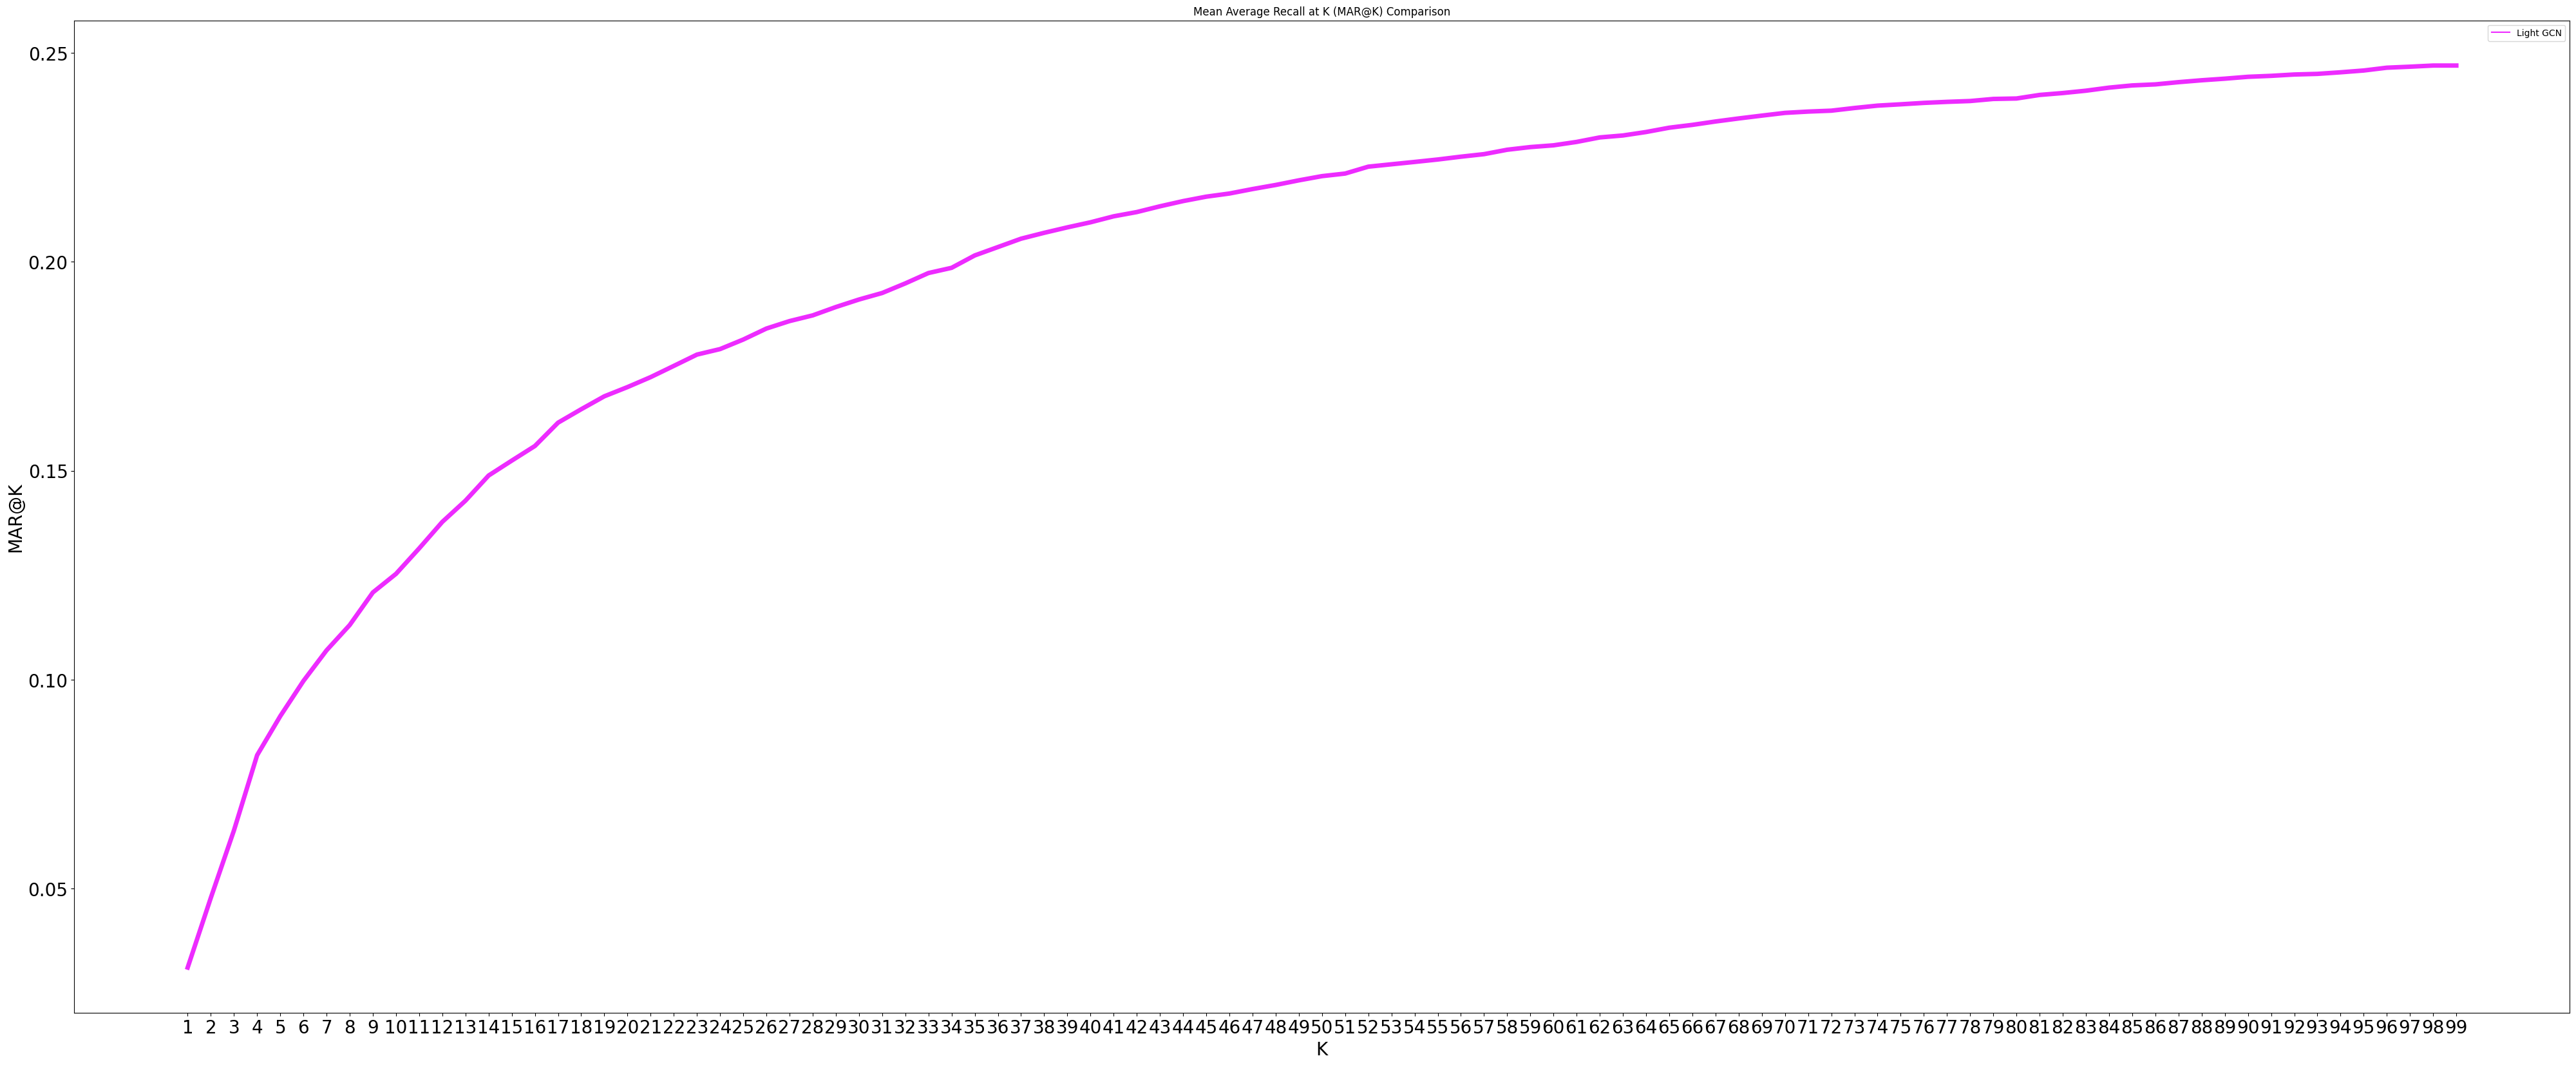

In [59]:
plt.figure(figsize=(50, 20))
recmetrics.mark_plot([MAR], ["Light GCN"], range(1, 100))

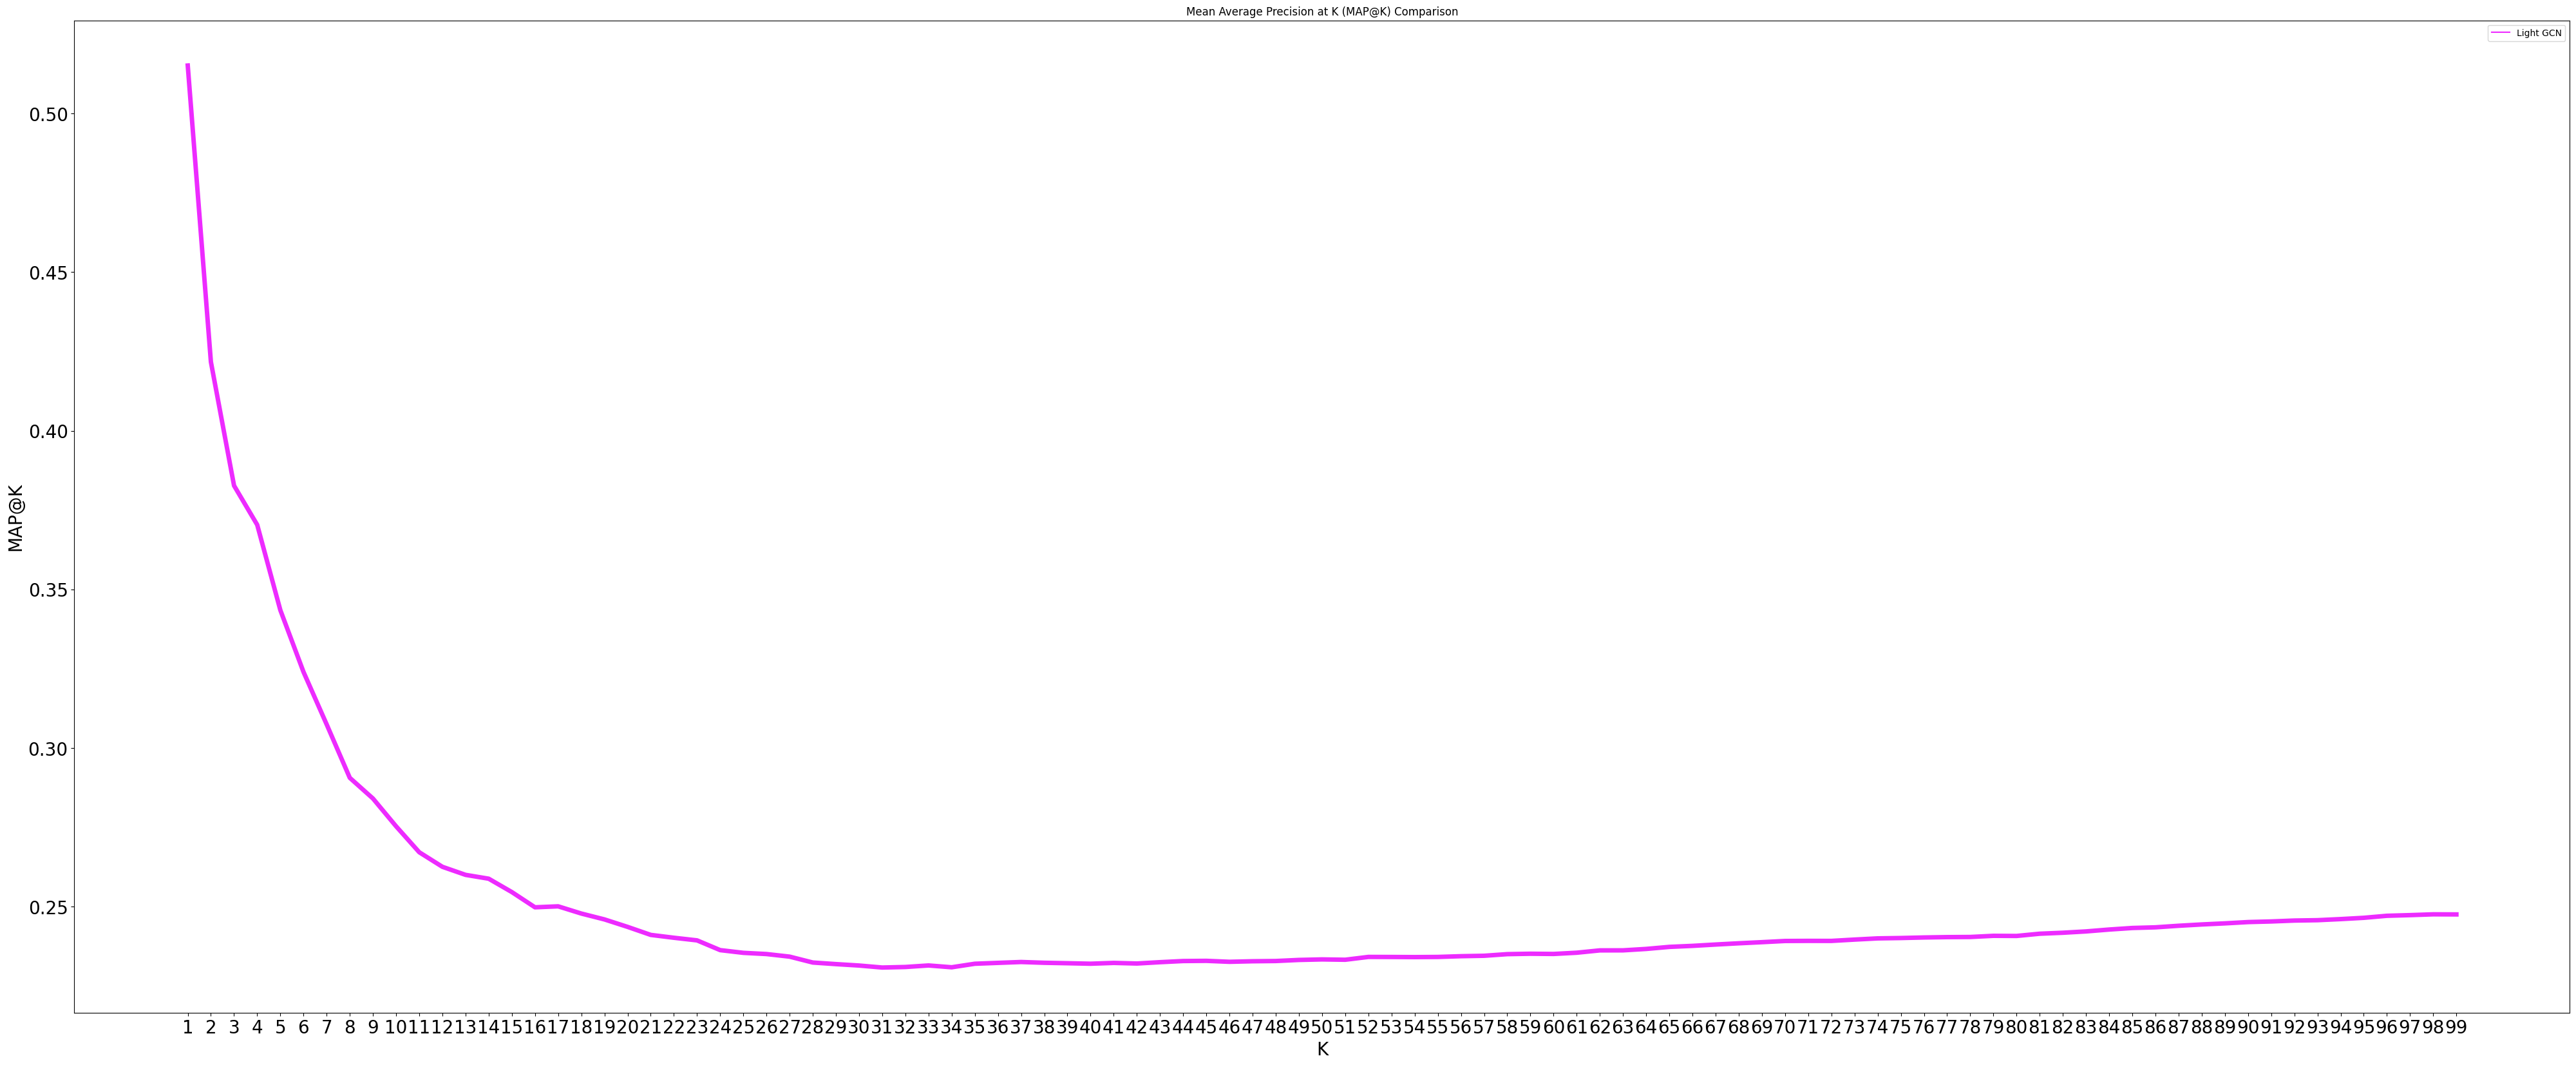

In [60]:
plt.figure(figsize=(50, 20))
recmetrics.mapk_plot([MAP], ["Light GCN"], range(1, 100))